In [8]:
from os import system
from pathlib import Path
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate, signal
import csv
from scipy import interpolate
# Constants in SI
eV2Joule = 1.6021*10**(-19)
hbar = 6.62 * 10**(-34) / (2* np.pi)
pc2meter = 3.086 * 10**(16)
arcsec2rad = 4.84814 * 10**(-6)
clight = 3*10**8
G_const = 6.67 * 10**(-11)
m_sun = 1.989 * 10**(30)
yr2sec = 365.25 * 24 *3600
eV2kg = eV2Joule/clight**2
# Other constants
hbar_eV = 4.135667696e-15 / (2*np.pi) # In eV*sec
M_planck = 1.22e19 # in GeV
G_astro = G_const/clight**2*m_sun/1e3/pc2meter # G_Newton in kpc/Msun

# Cosmology
h0 = 0.674
Om = 0.122/h0**2
Ob = 0.022/h0**2
OL = 1 - Om - Ob
H_0 = h0*100

def rewrite_last(n=1): # rewrites the last character, to make sure the array is properly "closed"
    txt = Path('data_plot.txt').read_text()
    txt = txt[:-n] + ']'
    f = open('data_plot.txt', 'w')
    f.write(txt)
    f.close()
    
runs_info_arr = []
# name, savefig_name, mass, Lphys, zoom, titles, Mbox_tot

# 1em25
runs_info_arr.append(["out_Eddington_plot/out_nfwExt_Eddington_NFW_mpi_nfields_1_Nx256_L_100.000000__RsExt_7.200000_rh0Ext_0.005000_Rs_7.200000_rh00_0.000730_profiles.txt",
                      "_1em25_ext.pdf", 1e-25, 1000,8,r'1 Halo, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-25}$ eV",r"",
                        r"$m= 1\times 10^{-25}$ eV",r"", 1.18e13])
# ext NFW Hernq
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_NFW_mpi_nfields_1_Nx256_L_100.000000__RsExt_7.200000_rh0Ext_0.005000_RhExt_0.800000_MhExt_1.170000_Rs_7.200000_rh00_0.000730_profiles.txt",
                      "_1em25_ext_pot_Hernq.pdf", 1e-25, 1000,4,r'1 Halo, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-25}$ eV",r"",
                        r"$m= 1\times 10^{-25}$ eV",r"", 1.18e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_100.000000_rho_percent_0.850000_rs_8.600000_rhos_0.004400_profiles.txt",
                      "_1em25_heavyMass1em23_1halo.pdf", 1e-25, 1200,2,r'1 Halo, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-25}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 1\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 2.2e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_100.000000_rho_percent_0.850000_rs_7.200000_rhos_0.020000_profiles.txt",
                      "_1em25_2_heavyMass1em23_1halo.pdf", 1e-25, 1200,2,r'1 Halo, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-25}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 1\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 6.6e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_100.000000_rho_percent_0.850000_rs_4.850000_rhos_0.003000_rs_5.600000_rhos_0.002700_profiles.txt",
                      "_1em25_heavyMass1em23_2halos.pdf", 1e-25, 1000,1,r'2 Halos, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 2 halos, $m= 1\times 10^{-25}$ eV",r"Convergence field, 2 halos, $m= 10^{-23}$ eV",
                        r"$m= 1\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 0.9e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_50.000000_rho_percent_0.850000_rs_5.200000_rhos_0.011000_rs_4.900000_rhos_0.010000_rs_4.000000_rhos_0.013000_profiles.txt",
                      "_1em25_3halos.pdf", 1e-25, 1000,4,r'3 Halos, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 3 halos, $m= 1\times 10^{-25}$ eV",r"",
                        r"$m= 1\times 10^{-25}$ eV",r"", 1.18e13])
# 2em25
runs_info_arr.append(["out_Eddington_plot/out_nfwExt_Eddington_NFW_mpi_nfields_1_Nx256_L_100.000000__RsExt_7.200000_rh0Ext_0.019500_Rs_7.200000_rh00_0.003000_profiles.txt",
                      "_2em25_ext.pdf", 2e-25, 800,8,r'1 Halo, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 2\times 10^{-25}$ eV",r"",
                        r"$m= 2\times 10^{-25}$ eV",r"", 1.18e13])
# 16
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_NFW_mpi_nfields_1_Nx512_L_100.000000__RsExt_8.900000_rh0Ext_0.008000_RhExt_1.000000_MhExt_3.750000_Rs_8.900000_rh00_0.001200_profiles.txt",
                      "_2em25_ext_pot_Hern.pdf", 2e-25, 800,2,r'1 Halo, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 2\times 10^{-25}$ eV",r"",
                        r"$m= 2\times 10^{-25}$ eV",r"", 1.13e13])
# 4
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_50.000000_rho_percent_0.850000_rs_7.200000_rhos_0.019500_profiles.txt",
                      "_2em25_heavyMass1em23_1halo.pdf", 2e-25, 1200,4,r'1 Halo, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 2\times 10^{-25}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 2\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 1.45e13])
# 5
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_20.000000_rho_percent_0.850000_rs_6.600000_rhos_0.060000_profiles.txt",
                      "_2em25_2_heavyMass1em23_1halo.pdf", 2e-25, 1200,4,r'1 Halo, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 2\times 10^{-25}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 2\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 1.45e13])
# 3
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_50.000000_rho_percent_0.850000_rs_4.200000_rhos_0.027000_rs_6.300000_rhos_0.021000_profiles.txt",
                      "_2em25_heavyMass1em23_2halos.pdf", 2e-25, 800,4,r'2 Halos, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 2 halos, $m= 2\times 10^{-25}$ eV",r"Convergence field, 2 halos, $m= 10^{-23}$ eV",
                        r"$m= 2\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 2.5e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_50.000000_rho_percent_0.850000_rs_5.200000_rhos_0.011000_rs_4.900000_rhos_0.010000_rs_4.000000_rhos_0.013000_profiles.txt",
                      "_2em25_3halos.pdf", 2e-25, 800,8,r'3 Halos, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 3 halos, $m= 2\times 10^{-25}$ eV",r"",
                        r"$m= 2\times 10^{-25}$ eV",r"", 1.18e13])
# 5em25
# 14
runs_info_arr.append(["out_Eddington_plot/out_nfwExt_Eddington_NFW_mpi_nfields_1_Nx256_L_100.000000__RsExt_6.600000_rh0Ext_0.051000_Rs_6.600000_rh00_0.009000_profiles.txt",
                      "_5em25_ext_pot_test.pdf", 5e-25, 800,2,r'1 Halo, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 5\times 10^{-25}$ eV",r"",
                        r"$m= 5\times 10^{-25}$ eV",r"", 1.05e13])
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_NFW_nfields_1_Nx512_L_100.000000__RsExt_8.900000_rh0Ext_0.052000_RhExt_0.990000_MhExt_23.000000_Rs_8.900000_rh00_0.007500_profiles.txt",
                      "_5em25_ext_pot_Hern.pdf", 5e-25, 800,8,r'1 Halo, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 5\times 10^{-25}$ eV",r"",
                        r"$m= 5\times 10^{-25}$ eV",r"", 1.05e13])
# 6
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_20.000000_rho_percent_0.850000_rs_6.600000_rhos_0.060000_profiles.txt",
                      "_5em25_heavyMass1em23_1halo.pdf", 5e-25, 800,4,r'1 Halo, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 5\times 10^{-25}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 5\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 0.9e13])
# 7, long run
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_20.000000_rho_percent_0.850000_rs_6.601000_rhos_0.060000_profiles.txt",
                      "_5em25_heavyMass1em23_1halo_2.pdf", 5e-25, 800,4,r'1 Halo, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 5\times 10^{-25}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 5\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 0.9e13])
# 8
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_20.000000_rho_percent_0.850000_rs_5.500000_rhos_0.060000_rs_4.850000_rhos_0.070000_profiles.txt",
                      "_5em25_heavyMass1em23_2halos.pdf", 5e-25, 800,4,r'2 Halos, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 2 halos, $m= 5\times 10^{-25}$ eV",r"Convergence field, 2 halos, $m= 10^{-23}$ eV",
                        r"$m= 5\times 10^{-25}$ eV",r"$m= 10^{-23}$ eV", 1.05e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_20.000000_rho_percent_0.850000_rs_3.900000_rhos_0.080000_rs_5.250000_rhos_0.070000_rs_2.400000_rhos_0.100000_profiles.txt",
                      "_5em25_3halos.pdf", 5e-25, 800,8,r'1 Halo, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 5\times 10^{-25}$ eV",r"",
                        r"$m= 5\times 10^{-25}$ eV",r"", 1.18e13])

# 1em24
runs_info_arr.append(["out_Eddington_plot/out_nfwExt_Eddington_NFW_mpi_nfields_1_Nx256_L_100.000000__RsExt_7.900000_rh0Ext_0.215000_Rs_7.900000_rh00_0.032000_profiles.txt",
                      "_1em24_ext.pdf", 1e-24, 800,8,r'1 Halo, $ m= 1\times 10^{-24} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-24}$ eV",r"",
                        r"$m= 1\times 10^{-24}$ eV",r"", 1.18e13])
# ext NFW Hernq, 1em24, bad one
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_NFW_mpi_nfields_1_Nx256_L_100.000000__RsExt_8.900000_rh0Ext_0.200000_RhExt_0.990000_MhExt_93.000000_Rs_8.900000_rh00_0.030000_profiles.txt",
                      "_1em24_ext_Hernq.pdf", 1e-24, 800,8,r'1 Halo, $ m= 1\times 10^{-24} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-24}$ eV",r"",
                        r"$m= 1\times 10^{-24}$ eV",r"", 1.18e13])
# 18
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_10.000000_rho_percent_0.850000_rs_7.900000_rhos_0.215000_profiles.txt",
                      "_1em24_heavyMass1em23_1halo.pdf", 1e-24, 800,4,r'1 Halo, $ m= 1\times 10^{-24} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-24}$ eV",r"Convergence field, 1 halo, $m= 10^{-23}$ eV",
                        r"$m= 1\times 10^{-24}$ eV",r"$m= 10^{-23}$ eV", 1.18e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_10.000000_rho_percent_0.850000_rs_5.600000_rhos_0.260000_rs_4.850000_rhos_0.290000_profiles.txt",
                      "_1em24_heavyMass1em23_2halos.pdf", 1e-24, 800,4,r'2 Halos, $ m= 1\times 10^{-24} $ eV',
                      r"Convergence field, 2 halos, $m= 1\times 10^{-24}$ eV",r"Convergence field, 2 halos, $m= 10^{-23}$ eV",
                        r"$m= 1\times 10^{-24}$ eV",r"$m= 10^{-23}$ eV", 1.15e13])
runs_info_arr.append(["out_Eddington_plot/Eddington_halos_NFW_mpi_nfields_2_Nx512_L_100.000000_rmass_1.000000_rho_percent_0.150000_rmass_10.000000_rho_percent_0.850000_rs_5.260000_rhos_0.270000_rs_4.400000_rhos_0.300000_rs_3.900000_rhos_0.330000_profiles.txt",
                      "_1em24_3halos.pdf", 1e-24, 700,8,r'3 Halos, $ m= 1\times 10^{-24} $ eV',
                      r"Convergence field, 3 halos, $m= 1\times 10^{-24}$ eV",r"",
                        r"$m= 1\times 10^{-24}$ eV",r"", 1.18e13])
# Burkert runs
# 40 Hernquist Burkert, m=1e-25
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_Burkert_nfields_1_Nx256_L_100.000000__RsExt_7.200000_rh0Ext_0.005000_RhExt_0.800000_MhExt_1.170000_Rs_7.200000_rh00_0.000660_profiles.txt",
                      "_1em25_ext_Hernq_Burk.pdf", 1e-25, 1000,16,r'1 Halo, $ m= 1\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-25}$ eV",r"",
                        r"$m= 1\times 10^{-25}$ eV",r"", 1.18e13])
# 39 Hernquist Burkert, m=2e-25
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_Burkert_nfields_1_Nx256_L_100.000000__RsExt_8.900000_rh0Ext_0.008000_RhExt_1.000000_MhExt_3.750000_Rs_8.900000_rh00_0.001100_profiles.txt",
                      "_2em25_ext_Hernq_Burk.pdf", 2e-25, 700,16,r'1 Halo, $ m= 2\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 2\times 10^{-25}$ eV",r"",
                        r"$m= 2\times 10^{-25}$ eV",r"", 1.18e13])
# 38 Hernquist Burkert, m=5e-25
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_Burkert_nfields_1_Nx256_L_100.000000__RsExt_8.900000_rh0Ext_0.052000_RhExt_0.990000_MhExt_23.000000_Rs_8.900000_rh00_0.006900_profiles.txt",
                      "_5em25_ext_Hernq_Burk.pdf", 5e-25, 700,16,r'1 Halo, $ m= 5\times 10^{-25} $ eV',
                      r"Convergence field, 1 halo, $m= 5\times 10^{-25}$ eV",r"",
                        r"$m= 5\times 10^{-25}$ eV",r"", 1.18e13])
# 37 Hernquist Burkert, m=1e-24
runs_info_arr.append(["out_Eddington_plot/out_Ext_Eddington_Hernquist_Burkert_nfields_1_Nx256_L_100.000000__RsExt_8.900000_rh0Ext_0.200000_RhExt_0.990000_MhExt_93.000000_Rs_8.900000_rh00_0.027000_profiles.txt",
                      "_1em24_ext_Hernq_Burk.pdf", 1e-24, 700,16,r'1 Halo, $ m= 1\times 10^{-24} $ eV',
                      r"Convergence field, 1 halo, $m= 1\times 10^{-24}$ eV",r"",
                        r"$m= 1\times 10^{-24}$ eV",r"", 1.18e13])



def find_index(arr, value, flag_greater):
    for i in range(len(arr)):
        if arr[i] > value and flag_greater == True:
            return i
        elif arr[i] < value and flag_greater == False:
            return i
    return i # In case nothing is found
def mass_from_density(x_arr,rho_arr, final_index):
    mass = 4*np.pi*rho_arr[0]*x_arr[0]**3/3
    for i in range(1,final_index):
        mass += 4*np.pi*rho_arr[i]*x_arr[i]**2*(x_arr[i]-x_arr[i-1])
    return mass
def integrand_sol(x,a,b,lambd):
  return lambd**4*4*np.pi*x**2/(1+a**2*lambd**2*x**2)**(2*b)

from lenstronomy.LensModel.Profiles.nfw import NFW
def conv_nfw(r,rhos,rs, sigmacrit):
  return NFW().density_2d(r,0,rs,rhos/sigmacrit)
def label_run(string_savefile):
  if "Burk" in string_savefile:
    return "1 Burkert halo, ext NFW + Hernq."
  elif "ext_pot_Hern" in string_savefile or "ext_Hernq" in string_savefile:
    return "1 halo, ext NFW + Hernq."
  elif "ext_pot" in string_savefile:
     return "1 halo, ext NFW"
  elif "ext" in string_savefile:
     return "1 halo, ext NFW"
  elif "1halo" in string_savefile:
    return "1 halo, 2 fields"
  elif "2halos" in string_savefile:
     return "2 halos, 2 fields"
  elif "3halos" in string_savefile:
     return "3 halos, 2 fields"

In [9]:
from gettext import find
from operator import index
from astropy.cosmology import FlatLambdaCDM
from scipy.special import gamma
from scipy.optimize import fsolve
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from lenstronomy.LensModel.Profiles.nfw import NFW
from lenstronomy.LensModel.Profiles.hernquist import Hernquist

# Use a reference z=0.1
rhoc = 2.7*0.7**2 * 10**2 *(0.7+0.3*1.1**3) # in Msun/kpc^3
# rhoc = 2.7*0.7**2 * 10**2  # in Msun/kpc^3
def f_nfw(x):
  return np.log(1+x) + 1/(1+x) -1
def c200_func(M200):
  c200 = 10**(1.02 - 0.109*(np.log10(M200/1.47) -12))
  rs = (3*M200/(4*np.pi*200*rhoc))**(1/3)/c200
  rhos = 200*rhoc*c200**3/(3*f_nfw(c200))
  return c200, rs, rhos
def M_nfw(r, rs, rhos):
  return 4*np.pi*rhos*rs**3*f_nfw(r/rs)
def density_nfw(r,rs,rhos):
  return rhos*rs**3/(r*(r+rs)**2)
def cyc(i,Nx):
  if i > Nx/2:
    return i-Nx
  return i

cosmo = FlatLambdaCDM(H0=h0*100, Om0=Om, Ob0=0.)
zl_des, zs_des = 0.597, 2.375
zlrx, zs_rx = 0.295, 0.654 

zl, zs, = [zlrx, zl_des], [zs_rx, zs_des]

m_arr, M_arr, rc_arr, kappa_c_arr, savefig_arr, rs_arr, rhos_arr = [], [], [], [], [], [], []
kappa01rs_uldm_arr, kappa01rs_uldm_arr_close,kappa01rs_uldm_arr_far, kappac_01rs_arr, M200_arr = [], [],[],[],[]
kappa_uldm_central_minus, kappa_uldm_central_plus, kappa_uldm_central = [], [], []
radial_conv_arr, radial_conv_cdm_arr, distance_arr = [], [], []
params_sol_arr, deltaE_arr, rhomax_arr, mass_convert_arr =[], [], [],[]
displaced_conv_center, deltaE_displaced, deltaE_displaced_close = [], [], []
theta_E_arr, max_deltakappac_arr, deltaE_integral_arr = [], [], []
rhomax_plus_arr, rhomax_minus_arr, par_sol_plus_arr, par_sol_minus_arr = [], [], [], []
rc_arr_plus, rc_arr_minus, params_sol_1gyr_arr = [], [], []
rhomax_1gyr_arr, Msol_r200_arr, Msol_r200_arr_1gyr = [], [], []
density_convert_arr = []

for i in range(len(runs_info_arr)):
  file_name, name_savefig, m, Lphys, zoom, title_plot_den, title_conv, title_conv_heavy, mass_string, mass_string_heavy, Mbox_record = runs_info_arr[i]
  print(i)
  m_arr.append(m)
  savefig_arr.append(name_savefig)
  f = open(file_name.replace('profiles.txt','initial_cond_info.txt'))
  try:
      initial_cond_arr = np.loadtxt(f,dtype=str)
  except: # In certain cases, the initial condition array has different number of columns for different rows
      initial_cond_arr = np.loadtxt(f,dtype=str, max_rows=1)
  # rs_tilde, rhos_tilde = float(initial_cond_arr[0][2]), float(initial_cond_arr[0][4])
  if "nfields_2" in file_name:
      nfields = 2
  else:
      nfields = 1
  system("bash change_grid.sh "+file_name)
  rewrite_last()
  f = open('data_plot.txt')
  array = np.array(json.load(f))
  f.close()

  file_data = file_name.replace('profiles.txt','times_grid.txt')
  system("bash change_grid.sh "+file_data)
  rewrite_last()
  f = open('data_plot.txt')
  array_grid = np.array(json.load(f))
  times_grid = array_grid[:,0]
  f.close()

  file_data = file_name.replace('profiles.txt','times_profile.txt')
  system("bash change_grid.sh "+file_data)
  rewrite_last()
  f = open('data_plot.txt')
  array_data = np.array(json.load(f))
  time_array = range(len(array_data))
  f.close()
  field_find = 7*np.arange(nfields)

  times_sim = np.array(array_data[:,0])
  max_density = np.array(array_data[:,1+field_find])
  maxx = np.array(array_data[:,2+field_find])
  maxy = np.array(array_data[:,3+field_find])
  maxz = np.array(array_data[:,4+field_find])
  e_kin_total = np.array(array_data[:,5+field_find])
  e_pot_time = np.array(array_data[1:,6+field_find])
  mass_total = np.array(array_data[:,7+field_find])
  etot = np.array(array_data[:,7*nfields+1])

  file_data = file_name.replace('profiles.txt','runinfo.txt')
  system("bash change_grid.sh "+file_data)
  f = open('data_plot.txt')
  array_runinfo = np.array(np.loadtxt(f))
  f.close()

  Length = float(array_runinfo[2])
  time_final = array_runinfo[0]
  Nx = array_runinfo[4]
  delta_x = Length/Nx
  if "Ext" in file_name:
    rs_tilde, rhos_tilde = float(array_runinfo[7]), float(array_runinfo[8])
  else:
    rs_tilde, rhos_tilde = float(initial_cond_arr[0][2]), float(initial_cond_arr[0][4])
  def distance(i, whichfield): # distance at the (discretized) time i, middle point of the bin;
      # this means that, when integrate up to distance(i), you actually integrate up to distance(i) + 0.5*Length/Nx
      return array[i][whichfield][0]
  def density(i, whichfield): # distance at the (discretized) time i
      return array[i][whichfield][1]
  # Find Hubble time snapshot
  beta = (Length/(Lphys*1e3*pc2meter*m/hbar_eV/clight))**2
  t_H = 1/H_0*(1e3*pc2meter) # in s
  t_H_grid = beta*t_H*m/hbar_eV
  # Mass box in 1e12 Msun
  if 'Ext' in file_name:
    M_arr.append(Mbox_record/1e12)
  else:
    M_arr.append(np.sum(mass_total[0])*np.sqrt(beta)/(4*np.pi * G_astro*m/hbar_eV/clight*(1e3*pc2meter))/1e12)
  index_Hubble = find_index(times_sim, t_H_grid, flag_greater=True)
  index_Hubble_minus1Gyr = find_index(times_sim, t_H_grid-beta*m/hbar_eV*1e9*yr2sec, flag_greater=True)
  index_Hubble_plus1Gyr = find_index(times_sim, t_H_grid+beta*m/hbar_eV*1e9*yr2sec, flag_greater=True)
  index_Hubble_grid = find_index(times_grid, t_H_grid, flag_greater=True)
  print('index_Hubble, min, plus', index_Hubble, index_Hubble_minus1Gyr, index_Hubble_plus1Gyr)
  index_Hubble_grid_plus1Gyr = find_index(times_grid, t_H_grid+beta*m/hbar_eV*1e9*yr2sec, flag_greater=True)
  index_Hubble_grid_minus1Gyr = find_index(times_grid, t_H_grid-beta*m/hbar_eV*1e9*yr2sec, flag_greater=True)
  # If Hubble plus 1Gyr is out of bounds, rescale minus 1Gyr
  if(index_Hubble_grid_minus1Gyr == len(times_grid)-1):
    index_Hubble_grid_minus1Gyr = len(times_grid)-2
  if(index_Hubble_minus1Gyr == len(times_sim)-1):
    index_Hubble_minus1Gyr = len(times_sim)-2
  # Find R200
  density_convert = beta**2/(4*np.pi * G_astro*(hbar_eV/m*clight/1e3/pc2meter)**2)
  mass_convert = np.sqrt(beta)/(4*np.pi * G_astro*m/hbar_eV/clight*(1e3*pc2meter))
  mass_convert_arr.append(mass_convert)
  density_convert_arr.append(density_convert)
  if 'Ext' in file_name:
    index_r200 = find_index(density_nfw(distance(index_Hubble,0)*Lphys/Length,rs_tilde*Lphys/Length, 
                                        rhos_tilde*density_convert),200*rhoc, False)
    M200 = M_nfw(distance(index_Hubble,0)[index_r200]*Lphys/Length,rs_tilde*Lphys/Length,rhos_tilde*density_convert)
    M200_arr.append(M200)
  else:
    index_r200 = find_index((density(index_Hubble,0)+density(index_Hubble,1))*density_convert,200*rhoc, False)
    print('r200',distance(index_Hubble,0)[index_r200]*Lphys/Length, Lphys/2)
    # Find M200
    M200 = delta_x*(Lphys/Length)**3*density_convert*4*np.pi*np.sum([(
      density(index_Hubble,0)[i]+density(index_Hubble,1)[i])*distance(index_Hubble,0)[i]**2 for i in range(index_r200)])
    M200_arr.append(M200)
    print('M200', M200/1e12, np.sum(mass_total[0])*np.sqrt(beta)/(4*np.pi * G_astro*m/hbar_eV/clight*(1e3*pc2meter))/1e12)
    print('rhos, rs', rhos_tilde*density_convert, rs_tilde*Lphys/Length)
  # Find rc
  index_rc  = find_index(density(index_Hubble, 0),density(index_Hubble,0)[0]/2, False)
  index_rc_1gyr = [find_index(density(ind, 0),density(ind,0)[0]/2, False) for ind in range(index_Hubble_minus1Gyr,index_Hubble_plus1Gyr+1)]
  time_rc_minus = np.argmin(index_rc_1gyr) + index_Hubble_minus1Gyr
  time_rc_plus = np.argmax(index_rc_1gyr) + index_Hubble_minus1Gyr
  index_rc_minus = np.min(index_rc_1gyr)
  index_rc_plus = np.max(index_rc_1gyr)
  # a b fit for soliton
  def soliton_fit_density(r,a,b,index_time):
    lamb = (density(index_time,0)[0])**(1/4.)
    return lamb**4*(1 + a**2*lamb**2*r**2)**(-2*b)
  print(name_savefig)
  # Find the snapshot index with smallest and highest density
  rhomax_time_index = np.argmax([density(ind,0)[0] for ind in range(index_Hubble_minus1Gyr,index_Hubble_plus1Gyr+1)])
  rhomax_time_index = index_Hubble_minus1Gyr + rhomax_time_index
  rhomin_time_index = np.argmin([density(ind,0)[0] for ind in range(index_Hubble_minus1Gyr,index_Hubble_plus1Gyr+1)])
  rhomin_time_index = index_Hubble_minus1Gyr + rhomin_time_index
  print("indices",index_Hubble_minus1Gyr,index_Hubble_plus1Gyr, rhomax_time_index)
  rhomax_arr.append(density(index_Hubble,0)[0])
  rhomax_1gyr_arr.append([density(ind,0)[0] for ind in range(index_Hubble_minus1Gyr,index_Hubble_plus1Gyr+1)])
  rhomax_plus_arr.append(density(rhomax_time_index,0)[0])
  params_sol_1gyr = [curve_fit(lambda x,a,b : soliton_fit_density(x,a,b,ind), distance(ind,0)[:(2*index_rc)], 
                            density(ind,0)[:(2*index_rc)],
                            bounds=((0.1,1),(1,4)))[0] for ind in range(index_Hubble_minus1Gyr,index_Hubble_plus1Gyr+1)]
  params_sol, _ = curve_fit(lambda x,a,b : soliton_fit_density(x,a,b,index_Hubble), distance(index_Hubble,0)[:(2*index_rc)], 
                            density(index_Hubble,0)[:(2*index_rc)],
                            bounds=((0.1,1),(1,4)))
  # plt.plot(distance(index_Hubble,0)[:(2*index_rc)],density(index_Hubble,0)[:(2*index_rc)])
  # plt.plot(distance(index_Hubble,0)[:(2*index_rc)],
  #          soliton_fit_density(distance(index_Hubble,0)[:(2*index_rc)],*params_sol))
  # plt.show()
  params_sol_arr.append(params_sol)
  params_sol_1gyr_arr.append(params_sol_1gyr)
  # Msol up to r200
  Msol_r200_arr_1gyr.append([integrate.quad(integrand_sol,0,distance(ind,0)[index_r200],
                        args=(params_sol_1gyr[ind-index_Hubble_minus1Gyr][0],
                              params_sol_1gyr[ind-index_Hubble_minus1Gyr][1], 
                              (density(ind,0)[0])**(1/4.)))[0] 
                        for ind in range(index_Hubble_minus1Gyr,index_Hubble_plus1Gyr+1)])
  Msol_r200_arr.append(integrate.quad(integrand_sol,0,distance(index_Hubble,0)[index_r200],
                        args=(params_sol[0],params_sol[1], 
                              (density(index_Hubble,0)[0])**(1/4.)))[0])
  
  # rc in kpc
  rc = distance(index_Hubble,0)[index_rc]*Lphys/Length
  rc_arr.append(rc)
  rc_plus = distance(time_rc_plus,0)[index_rc_plus]*Lphys/Length
  rc_arr_plus.append(rc_plus)
  rc_minus = distance(time_rc_minus,0)[index_rc_minus]*Lphys/Length
  rc_arr_minus.append(rc_minus)
  
  if "2halo" in name_savefig: # If 2 halos are in file name, the final rs is different!
    _,rs_phys,rhos_phys = c200_func(np.sum(mass_total[0])*np.sqrt(beta)/(4*np.pi * G_astro*m/hbar_eV/clight*(1e3*pc2meter)))
    rs_arr.append(rs_phys)
    rhos_arr.append(rhos_phys)
    rs_tilde=rs_phys*Length/Lphys
    print('2Halo')
  else:
    rhos_phys = rhos_tilde*density_convert
    rs_phys = rs_tilde*Lphys/Length
    rs_arr.append(rs_phys)
    rhos_arr.append(rhos_phys)
  # Theta E
  theta_run = []
  for zz in range(len(zl)):
    lens_cosmo = LensCosmo(z_lens = zl[zz], z_source = zs[zz], cosmo = cosmo)
    sigma_cr, Dl = lens_cosmo.sigma_crit/1e6, cosmo.angular_diameter_distance(zl[zz]).value *1e3
    rhos_angle = rhos_phys/sigma_cr*Dl*arcsec2rad
    thetas = rs_phys/Dl/arcsec2rad
    rH = (8*rs_phys/72)/Dl/arcsec2rad
    sigmaH = (8e11*M200/1.36e13)/2/np.pi/sigma_cr/(8*rs_phys/72)**2 
    alphars = NFW().rho02alpha(rhos_angle, thetas)
    def theta_E_find(theta_E):
      return NFW().derivatives(theta_E,0, thetas, alphars)[0]+ Hernquist().derivatives(theta_E,0,sigmaH,rH)[0] - theta_E
    theta_E = fsolve(theta_E_find, 0.1*thetas)
    theta_plot = np.linspace(0,3,100)
    plt.show()
    # In kpc
    theta_run.append(theta_E[0]*arcsec2rad*Dl)
  print('theta E', theta_run)
  theta_E_arr.append(theta_run)
  
  # Convergence
  filename_search = file_name.replace('profiles.txt','')
  filename_anim = filename_search+'profile_sliced.txt'
  system("bash change_grid.sh "+filename_anim)
  rewrite_last()
  f = open('data_plot.txt')
  # array_anim = np.log10(np.array(json.load(f)))
  array_anim = np.array(json.load(f))[:]
  f.close()
  Sigma_crit = 0.2 # in 1e10 Msun/kpc^2, reference convergence
  convergence_convert=100/Nx * beta**(3/2.)*(m/hbar_eV/clight*1e3*pc2meter)/(4*np.pi*G_astro)/1e10 /Sigma_crit
  # Find convergence at theta_E
  convergence_field_uldm = convergence_convert*array_anim[index_Hubble_grid,0]
  kappa_uldm_central.append(convergence_convert*np.max(convergence_field_uldm))
  arr_central_kappa = [np.max(array_anim[ti,0]) for ti in 
               range(index_Hubble_grid_minus1Gyr-1,index_Hubble_grid_plus1Gyr+1)]
  kappa_uldm_central_minus.append(convergence_convert*np.min(arr_central_kappa) )
  kappa_uldm_central_plus.append(convergence_convert*np.max(arr_central_kappa) )
  max_conv_point_x, max_conv_point_y = np.where(convergence_field_uldm==np.max(convergence_field_uldm))
  if nfields>1:
    convergence_field_cdm = convergence_convert*array_anim[index_Hubble_grid,1]
    max_conv_point_x_cdm, max_conv_point_y_cdm = np.where(convergence_field_cdm==np.max(convergence_field_cdm))
  else:
    max_conv_point_x_cdm, max_conv_point_y_cdm = Nx/2,Nx/2
  displ_center = delta_x*Lphys/Length*np.sqrt((max_conv_point_x_cdm-max_conv_point_x)**2+(max_conv_point_y_cdm-max_conv_point_y)**2)
  displaced_conv_center.append(displ_center)
  # Try build radially averaged convergence from the NFW center
  radial_conv, number_points = np.zeros(int(Nx/2)), np.zeros(int(Nx/2))
  radial_conv_cdm, number_points_cdm = np.zeros(int(Nx/2)), np.zeros(int(Nx/2))
  for i in range(int(Nx)):
    for j in range(int(Nx)):
      dist = int(np.sqrt(cyc(np.abs(i-max_conv_point_x_cdm),Nx)**2+cyc(np.abs(j-max_conv_point_y_cdm),Nx)**2))
      if nfields>1:
        dist_cdm = int(np.sqrt(cyc(np.abs(i-max_conv_point_x_cdm),Nx)**2+cyc(np.abs(j-max_conv_point_y_cdm),Nx)**2))
      if dist < int(Nx/2):
        radial_conv[dist] += convergence_field_uldm[i,j]
        number_points[dist] += 1
      if (nfields>1) and (dist_cdm < int(Nx/2)):
        radial_conv_cdm[dist_cdm] += convergence_field_cdm[i,j]
        number_points_cdm[dist_cdm] += 1
  for i in range(int(Nx/2)):
    radial_conv[i] = radial_conv[i]/number_points[i]
    if nfields>1:
      radial_conv_cdm[i] = radial_conv_cdm[i]/number_points_cdm[i]
  radial_conv_arr.append(radial_conv)
  if nfields>1:
    radial_conv_cdm_arr.append(radial_conv_cdm)
  else:
    radial_conv_cdm_arr.append(NFW().density_2d(
      Lphys/Length*distance(index_Hubble,0),0,rs_tilde*Lphys/Length, rhos_tilde*density_convert/(Sigma_crit*1e10)))
  distance_arr.append(Lphys/Length*distance(index_Hubble,0))
  # delta_E as integral of the spherically averaged convergence
  deltaE_integral1 = 2/theta_run[0]**2*np.sum([radial_conv[j]*distance(index_Hubble,0)[j]*
                            delta_x*(Lphys/Length)**2 for j in 
                            range(int(theta_run[0]*Length/Lphys/delta_x))])
  deltaE_integral2 = 2/theta_run[1]**2*np.sum([radial_conv[j]*distance(index_Hubble,0)[j]*
                            delta_x*(Lphys/Length)**2 for j in 
                            range(int(theta_run[1]*Length/Lphys/delta_x))])
  deltaE_integral_arr.append([deltaE_integral1, deltaE_integral2])
  # Convergence at the einstein angle point
  kappac_01rs = [radial_conv[int(np.floor((theta_run[0])*Length/Lphys/delta_x))],
                  radial_conv[int(np.floor((theta_run[1])*Length/Lphys/delta_x))]]
  # Convergence at the closest einstein angle point
  kappac_01rs_close = [radial_conv[int(np.ceil(np.abs(theta_run[0]- displ_center))*Length/Lphys/delta_x)],
                  radial_conv[int(np.ceil(np.abs(theta_run[1]- displ_center))*Length/Lphys/delta_x)]]
  kappac_01rs_far = [radial_conv[int(np.ceil(np.abs(theta_run[0]+ displ_center))*Length/Lphys/delta_x)],
                  radial_conv[int(np.ceil(np.abs(theta_run[1]+ displ_center))*Length/Lphys/delta_x)]]
  if 'Ext' in file_name:
    rho_phys = rhos_tilde * beta**2 * (m/hbar_eV/clight*1e3*pc2meter)**2/(4*np.pi*G_astro)
    convergence_nfw = conv_nfw(0.1*rs_tilde, rho_phys, rs_tilde, 1e10*Sigma_crit)
  else: 
    convergence_nfw = convergence_convert*array_anim[index_Hubble_grid,1, int(maxx[index_Hubble,1]+0.1*rs_tilde/delta_x), int(maxy[index_Hubble,1])]
  
  # Maximum convergence difference inside theta_E
  size_conv_field = len(convergence_field_uldm)
  conv_inside_thetaE1 = convergence_field_uldm[int(np.floor(max_conv_point_x_cdm-theta_run[0]*Length/Lphys/delta_x))
                              :int(np.ceil(max_conv_point_x_cdm+theta_run[0]*Length/Lphys/delta_x)),
                              int(np.floor(max_conv_point_y_cdm-theta_run[0]*Length/Lphys/delta_x))
                              :int(np.ceil(max_conv_point_y_cdm+theta_run[0]*Length/Lphys/delta_x))]
  conv_inside_thetaE2 = convergence_field_uldm[int(max_conv_point_x_cdm-theta_run[1]*Length/Lphys/delta_x)
                              :int(np.ceil(max_conv_point_x_cdm+theta_run[1]*Length/Lphys/delta_x)),
                              int(np.floor(max_conv_point_y_cdm-theta_run[1]*Length/Lphys/delta_x))
                              :int(np.ceil(max_conv_point_y_cdm+theta_run[1]*Length/Lphys/delta_x))]
  max_deltakappac_arr.append([np.max(conv_inside_thetaE1) -kappac_01rs, kappac_01rs - np.min(conv_inside_thetaE1),
                              np.max(conv_inside_thetaE2) -kappac_01rs, kappac_01rs - np.min(conv_inside_thetaE2)])
  # Params of the soliton
  a_sol, b_sol = params_sol
  thetac = rc/((2**(1/(2*b_sol))-1)**(1/2))
  thE_c2 = ((theta_run[1])/thetac)**2
  # print('thE_c2', thE_c2)
  # At the furthest einstein angle point
  thE_c2_h =((theta_run[1]+ displ_center)/thetac)**2
  # At the closest einstein angle point
  thE_c2_close =((theta_run[0]- displ_center)/thetac)**2 
  deltaE = ((1+thE_c2)**(2*b_sol-0.5) - (2*b_sol-0.5)*thE_c2 -1)/((2*b_sol-1.5)*thE_c2)*np.mean(kappac_01rs)
  # At the furthest einstein angle point
  deltaE_h = ((1+thE_c2_h)**(2*b_sol-0.5) - (2*b_sol-0.5)*thE_c2_h -1)/((2*b_sol-1.5)*thE_c2_h)*kappac_01rs[1]
  # At the closest einstein angle point
  deltaE_h_close = ((1+thE_c2_close)**(2*b_sol-0.5) - (2*b_sol-0.5)*thE_c2_close -1)/((2*b_sol-1.5)*thE_c2_close)*kappac_01rs[0]
  deltaE_arr.append(deltaE)
  deltaE_displaced.append(deltaE_h)
  deltaE_displaced_close.append(deltaE_h_close)
  kappa_c_arr.append(np.max(convergence_field_uldm))
  kappa01rs_uldm_arr.append(kappac_01rs)
  kappa01rs_uldm_arr_close.append(kappac_01rs_close)
  kappa01rs_uldm_arr_far.append(kappac_01rs_far)
  kappac_01rs_arr.append(convergence_nfw)

0
index_Hubble, min, plus 7 6 8
_1em25_ext.pdf
indices 6 8 8
theta E [np.float64(5.360698292142927), np.float64(11.470806460723933)]


/tmp/ipykernel_581273/185635952.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kappac_01rs_close = [radial_conv[int(np.ceil(np.abs(theta_run[0]- displ_center))*Length/Lphys/delta_x)],
/tmp/ipykernel_581273/185635952.py:300: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  radial_conv[int(np.ceil(np.abs(theta_run[1]- displ_center))*Length/Lphys/delta_x)]]
/tmp/ipykernel_581273/185635952.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kappac_01rs_far = [rad

1
index_Hubble, min, plus 25 24 27
_1em25_ext_pot_Hernq.pdf
indices 24 27 26
theta E [np.float64(5.360698292142927), np.float64(11.470806460723933)]
2
index_Hubble, min, plus 39 35 43
r200 294.14064 600.0
M200 11.115789428715303 19.594410318080648
rhos, rs 1447364.2551692754 103.2
_1em25_heavyMass1em23_1halo.pdf
indices 35 43 36
theta E [np.float64(2.2308758399256585), np.float64(6.545683051408671)]


KeyboardInterrupt: 

In [ ]:
## Ranges of lambda
from signal import Sigmasks

name_galaxies = ['B1608+656', 'DES0408-5354', 'HE0435-1223', 'PG1115+080', 'RXJ1131-1231', 'SDSS1206+4332', 'WFI2033-4723' ]
z_source_gal = [1.394, 2.375, 1.693, 1.722, 0.654, 1.789, 1.662]
z_lens_gal = [0.6304, 0.597, 0.4546, 0.311, 0.295, 0.745, 0.6575]

zl_des, zs_des = 0.597, 2.375
zlrx, zs_rx = 0.295, 0.654 

zl, zs, = [zlrx, zl_des], [zs_rx, zs_des]
lens_c = LensCosmo(z_lens = zl[0], z_source = zs[0], cosmo = cosmo)
sigma_max = lens_c.sigma_crit/1e6
lens_c = LensCosmo(z_lens = zl[1], z_source = zs[1], cosmo = cosmo)
sigma_min = lens_c.sigma_crit/1e6
print(sigma_min/1e10, sigma_max/1e10)


0.18536544900147878 0.34505995037299386


In [ ]:
m_arr = np.array(m_arr)
M_arr = np.array(M_arr)
rc_arr = np.array(rc_arr)
kappa_c_arr = np.array(kappa_c_arr)
kappa01rs_uldm_arr = np.array(kappa01rs_uldm_arr)
kappac_01rs_arr = np.array(kappac_01rs_arr)
rs_arr = np.array(rs_arr)
def select_indices(m):
  indices = []
  for i in range(len(m_arr)):
    if m_arr[i] == m:
      indices.append(i)
  return indices
lamb_min, lamb_max = Sigma_crit*1e10/sigma_max, Sigma_crit*1e10/sigma_min
print(lamb_min, lamb_max, Sigma_crit)
kappac_min, kappac_max, Msol_arr = [],[], []
deltaE_min, deltaE_max = [], []
delta_E_h_min, delta_E_h_max = [], []
delta_E_h_close_min, delta_E_h_close_max = [], []
Msol_plus_arr, Msol_minus_arr = [], []
for i in range(len(kappa01rs_uldm_arr)):
  asol, bsol = params_sol_arr[i]
  lamb = (rhomax_arr[i])**(1/4.)
  # lamb_plus = (rhomax_plus_arr[i])**(1/4.)
  # lamb_minus = (rhomax_minus_arr[i])**(1/4.)
  kappa_min_1gyr_factor = kappa_uldm_central_minus[i]/kappa_uldm_central[i]
  kappa_max_1gyr_factor = kappa_uldm_central_plus[i]/kappa_uldm_central[i]
  kappac_min.append(np.min(kappa01rs_uldm_arr[i])*lamb_min)
  kappac_max.append(np.max(kappa01rs_uldm_arr[i])*lamb_max)
  deltaE_min.append(deltaE_arr[i]*(1-lamb_min))
  deltaE_max.append(deltaE_arr[i]*(lamb_max-1))
  delta_E_h_min.append(np.minimum(deltaE_displaced[i], deltaE_displaced_close[i])*lamb_min)
  delta_E_h_max.append(np.maximum(deltaE_displaced[i], deltaE_displaced_close[i])*lamb_max)
  # delta_E_h_close_min.append(deltaE_displaced_close[i]*lamb_min)
  # delta_E_h_close_max.append(deltaE_displaced_close[i]*lamb_max)
  # Msol_tilde = np.pi**(3/2.)*lamb**4*gamma(-3/2. +2*bsol )/(np.abs(asol*lamb)**3*gamma(2*bsol))
  Msol_tilde = Msol_r200_arr[i]
  # rhomax in Msun/pc^3
  lamb_1gyr = (np.array(rhomax_1gyr_arr[i]))**(1/4.)
  a_sol1gyr, bsol1gyr = np.array(params_sol_1gyr_arr[i])[:,0], np.array(params_sol_1gyr_arr[i])[:,1]
  print('asol, bsol', a_sol1gyr, bsol1gyr)
  Msol_1gyr = [np.pi**(3/2.)*lamb_1gyr[jj]*4*gamma(-3/2. +2*bsol1gyr[jj] )/(np.abs(a_sol1gyr*lamb_1gyr[jj])**3
              *gamma(2*bsol1gyr)) for jj in range(len(rhomax_1gyr_arr[i]))]
  Msol_tilde_plus = np.max(Msol_r200_arr_1gyr[i])
  Msol_tilde_minus = np.min(Msol_r200_arr_1gyr[i])
  print('Msol', Msol_tilde, Msol_tilde_plus, Msol_tilde_minus)
  # print('lambda', lamb, lamb_plus, lamb_minus)
  Msol_arr.append(Msol_tilde*mass_convert_arr[i])
  Msol_plus_arr.append((Msol_tilde_plus-Msol_tilde)*mass_convert_arr[i])
  Msol_minus_arr.append((Msol_tilde-Msol_tilde_minus)*mass_convert_arr[i])
  thetac_i = rc_arr[i]/((2**(1/(2*bsol))-1)**(1/2))
  # print('thetac, deltaE, approx', thetac_i, deltaE_arr[i], 
  #       (bsol-1/4)*(0.1*rs_arr[i]/thetac_i)**2*kappa01rs_uldm_arr[i])
  # print(Msol_tilde, asol, bsol)
  # print(kappac_min[i], kappac_max[i])
  # print('deltaE',deltaE_arr[i], 'deltaE_h', deltaE_displaced[i], 'distance', displaced_conv_center[i])
masses = [1e-25, 2e-25, 5e-25, 1e-24]  
# for mm in masses:
#   ind = select_indices(mm)
#   # print(m_arr[i], M_arr[i], rc_arr[i], kappa_c_arr[i])
#   plt.scatter(M_arr[ind], kappa_c_arr[ind], label=mm)
# plt.xlabel(r'$M \ (10^{12} M_\odot)$ ')
# plt.ylabel(r'$\kappa_{\rm c}$')
# # handles, labels = plt.gca().get_legend_handles_labels()
# # by_label = dict(zip(labels, handles))
# # plt.legend(by_label.values(), by_label.keys())
# plt.legend()
# plt.show()

def predict_result(m,M,chi, rs_run):
  # Suppression factor of density after the core forms
  suppr_factor = 1
  gamma_pl = 2
  rc = 20*(M/1e13)**(-1/3)*(m/5e-25)**(-1)/2
  if rs_run > rc:
    # gamma_pl = 1+2*rc**2/(rs_run**2+rc**2)
    gamma_pl = 1.5
  A_kappa = 3/(3-gamma_pl)*(((450/20)*(M/1e13)**(2/3)*(m/5e-25))**(3-gamma_pl)-1)
  A_kappa = suppr_factor*(3*9.5*(M/1e13)**(1/3)*(m/5e-25)**(1/2) -6)
  kappac = 6*chi/(1+A_kappa)*(M/1e13)**(5/3)*(m/5e-25)**2
  return rc, kappac

# for mm in masses:
#   ind = select_indices(mm)
#   plt.scatter(rc_arr[ind], M_arr[ind], label=mm)
# plt.xlabel(r'$r_{\rm c} $ (kpc) ')
# plt.ylabel(r'$M \ (10^{12} M_\odot)$ ')
# plt.legend()


# for i in range(len(m_arr)):
#   rc_pred, kappa_pred = predict_result(m_arr[i], M200_arr[i],0.15, rs_arr[i])
#   print(kappa01rs_uldm_arr[i], kappa_pred, rc_pred, rs_arr[i])
m_previous = m_arr[0]
for i in range(len(m_arr)):
  if (m_previous != m_arr[i]):
    print('\\midrule')
  m_previous = m_arr[i]
  # print(savefig_arr[i], m_arr[i], M_arr[i], rc_arr[i], kappa_c_arr[i])
  rc_pred, kappa_pred = predict_result(m_arr[i], M200_arr[i],0.15, rs_arr[i])
  exponent_m = np.floor(np.log10(m_arr[i]))
  rhomax_plus_errorbar = (np.max(rhomax_1gyr_arr[i]) - rhomax_arr[i])*density_convert_arr[i]/1e6
  rhomax_minus_errorbar = (rhomax_arr[i] - np.min(rhomax_1gyr_arr[i]))*density_convert_arr[i]/1e6
  rhomax_phys = rhomax_arr[i]*density_convert_arr[i]/1e6
  theta_E_mid = np.mean(theta_E_arr[i])
  theta_E_max = np.max(theta_E_arr[i])- theta_E_mid
  theta_E_minus = theta_E_mid - np.min(theta_E_arr[i])
  delta_E_plus = delta_E_h_max- deltaE_displaced[i][0]
  delta_E_minus = deltaE_displaced[i][0]-delta_E_h_min
  deltak_mid = np.mean(max_deltakappac_arr[i])
  deltak_max = np.max(max_deltakappac_arr[i])*lamb_max-deltak_mid
  deltak_minus = deltak_mid- np.min(max_deltakappac_arr[i])*lamb_min
  kappac_mid = np.mean(kappa01rs_uldm_arr[i])
  kappac_plus = kappac_max[i] - kappac_mid
  kappac_minus = kappac_mid - kappac_min[i]
  delta_E_int_mid = np.mean(np.abs(deltaE_integral_arr[i] - kappac_mid))
  delta_E_int_plus = lamb_max*np.max(np.abs(deltaE_integral_arr[i] - kappac_mid)) - delta_E_int_mid
  delta_E_int_minus = np.abs(delta_E_int_mid- lamb_min*np.max(np.abs(deltaE_integral_arr[i] - kappac_mid)))
  if (100*deltak_mid > 3):
    textcolor = '\\textcolor{{red}}{{'
    textcolor_end = '}}'
  else:
    textcolor = ''
    textcolor_end = ''
  if 100*delta_E_int_mid > 3:
    textcolor2 = '\\textcolor{{red}}{{'
    textcolor_end2 = '}}'
  else:
    textcolor2 = ''
    textcolor_end2 = ''
  
  print(#'${:.0f}\\times 10^{{{:.0f}}}$'.format(10**(np.log10(m_arr[i])-exponent_m),exponent_m) 
        '${:.0f}$'.format(10**(np.log10(m_arr[i])+25)),
        '&',
        "${:.1f}$".format(M200_arr[i]/1e12),'&',
        "${:.1f}^{{+{:.1f}}}_{{-{:.1f}}}$".format(rhomax_phys, rhomax_plus_errorbar, rhomax_minus_errorbar), '&',
        "${:.1f}^{{+{:.1f}}}_{{-{:.1f}}}$".format(Msol_arr[i]/1e11, Msol_plus_arr[i]/1e11, Msol_minus_arr[i]/1e11),
        '&',"${:.0f}^{{+{:.0f}}}_{{-{:.0f}}}$".format(rc_arr[i], rc_arr_plus[i]-rc_arr[i], rc_arr[i]- rc_arr_minus[i]), 
        '&', "${:.0f}$".format(rc_pred), '&',
        "${:.1f}^{{+{:.1f}}}_{{-{:.1f}}}$".format(theta_E_mid,theta_E_max, theta_E_minus), '&', 
        # "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$".format(1e2*deltaE_displaced[i][0], 1e2*delta_E_h_max[i][0], 1e2*delta_E_h_min[i][0]),'&',
        ("$"+textcolor2+"{:.1f}^{{+{:.1f}}}_{{-{:.1f}}}"+textcolor_end2+"$").format(1e2*delta_E_int_mid, 1e2*delta_E_int_plus, 1e2*delta_E_int_minus),'&',
        ("$"+textcolor+"{:.1f}^{{+{:.1f}}}_{{-{:.1f}}}"+textcolor_end+"$").format(1e2*deltak_mid, 1e2*deltak_max, 1e2*deltak_minus),'&',
        "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$".format(kappac_mid, kappac_plus, kappac_minus), '&', 
         label_run(savefig_arr[i]), '\\\\')
# for i in range(len(m_arr)):
#   print('$10^{{{:.0f}}}$'.format(np.log10(m_arr[i])), '&', "${:.1f}$".format(M200_arr[i]/1e12),'&', "${:.1f}$".format(Msol_arr[i]/1e11), '&', "${:.3f}$".format(deltaE_arr[i]), '&',
#         "${:.3f}^{{+{:.3f}}}_{{-{:.3f}}}$".format(kappa01rs_uldm_arr[i], kappac_max[i], kappac_min[i]), '&',
#         label_run(savefig_arr[i]), '\\\\')
  # print(Msol_arr[i])
  # print(rs_arr[i], kappa_c_arr[i], kappac_01rs_arr[i], kappa01rs_uldm_arr[i]/(kappac_01rs_arr[i]+kappa01rs_uldm_arr[i]))
  # print('predicted rc, kappac', rc_pred, kappa_pred)

0.5796094266628429 1.0789497237880856 0.2
asol, bsol [0.58460525 0.63849445 0.59056893] [2.61174535 2.77207337 2.67589858]
Msol 0.37484022990600574 0.53874328961671 0.37484022990600574
asol, bsol [0.58951436 0.62531562 0.61256785 0.59958293] [2.52198655 2.72417873 2.63974095 2.64776571]
Msol 0.501479536380769 0.6621712390170174 0.501479536380769
asol, bsol [0.47673858 0.69543091 0.50856161 0.53171332 0.54413249 0.50233115
 0.4662439  0.85186319 0.69068152] [2.30284667 1.47226067 2.41210798 2.46955879 2.41424209 2.27527585
 2.78421402 1.00622455 1.46728006]
Msol 0.9254912268387288 2.0858110844637627 0.9254912268387288
asol, bsol [0.44048022 0.38271758 0.60376976 0.42246936 0.32185062 0.44887661
 0.3641444  0.46467184 0.45645368 0.81895549 0.59877628 0.39686868
 0.3814639  0.41137572 0.42666698 0.5350491  0.41228049 0.34555644
 0.72035914 0.47704984] [2.7648693  2.63107208 1.59284337 2.88361402 3.99417838 2.67336523
 3.9718538  2.45423591 2.44588528 1.00000151 1.63239908 3.34779343
 3.33

0.247103388056987
0.18536544900147878
0.20842325040139273
0.22650024666531085
0.34505995037299386
0.22501786742793672
0.2224120903298929
Sigma max, min 0.1737185461223064 0.6400384377778654


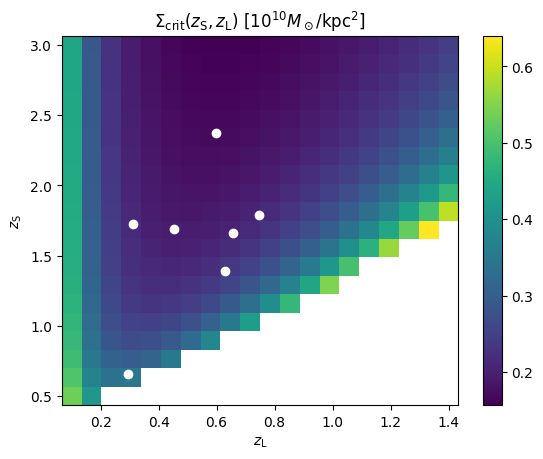

In [ ]:
# Sigma crit figure
npoints = 20
zlens = np.linspace(0.1, 1.4,npoints)
zsource = np.linspace(0.5, 3, npoints)
sigma_c_arr = np.zeros((npoints,npoints))
for i in range(npoints):
  for j in range(npoints):
    if zlens[i]< zsource[j]-0.3:
      lens_cosmo = LensCosmo(z_lens = zlens[i], z_source = zsource[j], cosmo = cosmo)
      sigma_c_arr[i,j] = lens_cosmo.sigma_crit/(1e16)
    else:
      sigma_c_arr[i,j]=np.nan
X,Y = np.meshgrid(zlens, zsource)

# Print the numerical values of sigma_crit for TDCOSMO
for i in range(len(z_lens_gal)):
  lens_cosmo = LensCosmo(z_lens = z_lens_gal[i], z_source = z_source_gal[i], cosmo = cosmo)
  print(lens_cosmo.sigma_crit/(1e16))

sigma_Min, sigma_Max = np.max(sigma_c_arr[~np.isnan(sigma_c_arr)]),np.min(sigma_c_arr[~np.isnan(sigma_c_arr)])
print('Sigma max, min',sigma_Max, sigma_Min)

plt.pcolormesh(X,Y,sigma_c_arr.T,shading='nearest')
plt.scatter(z_lens_gal, z_source_gal, color='white')
plt.xlabel(r'$z_{\rm L}$')
plt.ylabel(r'$z_{\rm S}$')
plt.title(r'$\Sigma_{\rm crit}(z_{\rm S},z_{\rm L}) \ [10^{10} M_\odot/{\rm kpc}^2]$ ')
plt.colorbar()
plt.clim(sigma_Min, sigma_Max)
# plt.savefig('plots/sigma_crit.pdf')
plt.show()



In [ ]:
# Make the soliton mass, delta_E plot
index_run = 0
a_sol, b_sol = params_sol_arr[index_run]
thetac = rc_arr[index_run]/((2**(1/(2*b_sol))-1)**(1/2)/a_sol)
delta_H0 = kappac_01rs_arr[index_run]
thE_c2 = (0.1*rs_arr[index_run]/thetac)**2
deltaE = ((1+thE_c2)**(2*b_sol-0.5) - (2*b_sol-0.5)*thE_c2 -1)/((2*b_sol-1.5)*thE_c2)*delta_H0
print('thetac', thetac, 'deltaE', deltaE,'delta_H0', delta_H0)

thetac 64.92767050090114 deltaE 0.0015643320767940955 delta_H0 0.04981343722158276


In [ ]:
for i in range(len(deltaE_displaced)):
  print("${:.2f}$".format(1e2*deltaE_displaced[i][0]),'&',
        "${:.2f}$".format(1e2*deltaE_displaced_close[i][0]),'&',
        "${:.2f}$".format(kappa01rs_uldm_arr[i]), '&', 
         "${:.2f}$".format(kappa01rs_uldm_arr_close[i]),label_run(savefig_arr[i]), '\\\\')
print('----------------------')
for i in range(len(deltaE_displaced)):
  print("${:.2f}$".format(kappa_uldm_central_minus[i]),'&',
        "${:.2f}$".format(kappa_uldm_central_plus[i]),'&',
        "${:.2f}$".format(kappa_c_arr[i]), '&', 
         label_run(savefig_arr[i]), '\\\\')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
# Try to look for radially averaged convergence
index = 8
print(savefig_arr[index])
plt.loglog(distance_arr[index], radial_conv_arr[index], label='uldm')
plt.loglog(distance_arr[index], radial_conv_cdm_arr[index], label='cdm')

In [ ]:
# Print rs 
for i in range(len(rs_arr)):
  print("${:.1f}$".format(rs_arr[i]))

In [ ]:
from lenstronomy.LensModel.Profiles.nfw import NFW
from lenstronomy.LensModel.Profiles.hernquist import Hernquist
from scipy.optimize import fsolve
zl_des, zs_des = 0.597, 2.375
zlrx, zs_rx = 0.295, 0.654 

zl, zs, = [zlrx, zl_des], [zs_rx, zs_des]
for index in range(len(rhos_arr)):
  theta_run = []
  for zz in range(len(zl)):
    lens_cosmo = LensCosmo(z_lens = zl[zz], z_source = zs[zz], cosmo = cosmo)
    sigma_cr, Dl = lens_cosmo.sigma_crit/1e6, cosmo.angular_diameter_distance(zl[zz]).value *1e3
    rhos, rs = rhos_arr[index]/sigma_cr*Dl*arcsec2rad, rs_arr[index]
    # print('Run, M200', savefig_arr[index], M200_arr[index]/1e13)
    # print('Dl, sigma_crit, rhos_angle, rs',Dl, sigma_cr, rhos,rs)
    thetas = rs/Dl/arcsec2rad
    rH = (8*rs_arr[index]/72)/Dl/arcsec2rad
    # print('rhos, rs', M200_arr[index]/1.36e13, 0.1*thetas, rH,rs_arr[index]/72)
    sigmaH = (8e11*M200_arr[index]/1.36e13)/2/np.pi/sigma_cr/(8*rs_arr[index]/72)**2 
    # print('thetas, rhos, sigmaH, rH',thetas, rhos, sigmaH, rH)
    alphars = NFW().rho02alpha(rhos, thetas)
    def theta_E_find(theta_E):
      return NFW().derivatives(theta_E,0, thetas, alphars)[0]+ Hernquist().derivatives(theta_E,0,sigmaH,rH)[0] - theta_E
      # return NFW().derivatives(theta_E,0, thetas, alphars)[0] - theta_E
    theta_E = fsolve(theta_E_find, 0.1*thetas)
    theta_plot = np.linspace(0,3,100)
    # plt.plot(theta_plot, theta_E_find(theta_plot))
    # plt.plot(theta_plot, NFW().derivatives(theta_plot,0, thetas, alphars)[0])
    # plt.plot(theta_plot, Hernquist().derivatives(theta_plot,0,sigmaH,rH)[0])
    plt.show()
    theta_run.append(theta_E)
  print('theta_E', theta_run, M200_arr[index]/1e13)